In [ ]:
!git clone https://github.com/dheovanwa/Supreme-court-judgement-classification.git

fatal: destination path 'Supreme-court-judgement-classification' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./Supreme-court-judgement-classification/justice.csv')
df.tail()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
3298,3298,63324,United States v. Palomar-Santiago,https://api.oyez.org/cases/2020/20-437,20-437,2020,United States,Refugio Palomar-Santiago,"<p>Refugio Palomar-Santiago, a Mexican nationa...",2054,9,0,True,majority opinion,reversed/remanded,Criminal Procedure
3299,3299,63323,Terry v. United States,https://api.oyez.org/cases/2020/20-5904,20-5904,2020,Tarahrick Terry,United States,<p>Tarahrick Terry pleaded guilty to one count...,1027,9,0,False,majority opinion,affirmed,Criminal Procedure
3300,3300,63331,United States v. Cooley,https://api.oyez.org/cases/2020/19-1414,19-1414,2020,United States,Joshua James Cooley,<p>Joshua James Cooley was parked in his picku...,1309,9,0,True,majority opinion,vacated/remanded,Civil Rights
3301,3301,63332,Florida v. Georgia,https://api.oyez.org/cases/2020/142-orig,142-orig,2020,Florida,Georgia,<p>This is an ongoing case of original jurisdi...,297,9,0,False,majority opinion,none,NaN
3302,3302,63335,PennEast Pipeline Co. v. New Jersey,https://api.oyez.org/cases/2020/19-1039,19-1039,2020,PennEast Pipeline Co. LLC,"New Jersey, et al.","<p>The Natural Gas Act (NGA), 15 U.S.C. §§ 717...",1059,5,4,True,majority opinion,reversed/remanded,Due Process


In [ ]:
df = df[['facts', 'issue_area', 'first_party_winner']]
df

,facts,issue_area,first_party_winner
0,"<p>In 1970, Jane Roe (a fictional name used in...",NaN,True
1,<p>Joan Stanley had three children with Peter ...,Civil Rights,True
2,<p>John Giglio was convicted of passing forged...,Due Process,True
3,"<p>The Idaho Probate Code specified that ""male...",Civil Rights,True
4,"<p>Miller, after conducting a mass mailing cam...",First Amendment,True
...,...,...,...
3298,"<p>Refugio Palomar-Santiago, a Mexican nationa...",Criminal Procedure,True
3299,<p>Tarahrick Terry pleaded guilty to one count...,Criminal Procedure,False
3300,<p>Joshua James Cooley was parked in his picku...,Civil Rights,True
3301,<p>This is an ongoing case of original jurisdi...,NaN,False


# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   facts               3303 non-null   object
 1   issue_area          3161 non-null   object
 2   first_party_winner  3288 non-null   object
dtypes: object(3)
memory usage: 77.5+ KB


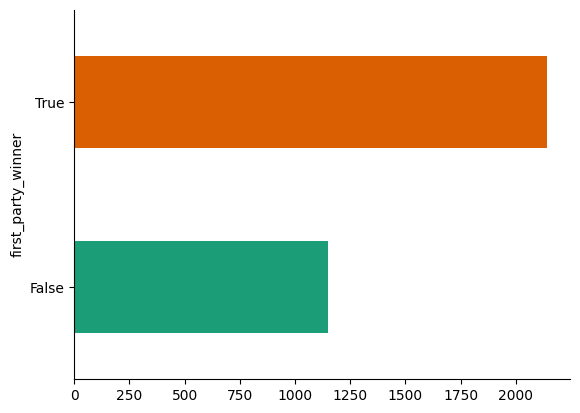

In [ ]:
df.groupby('first_party_winner').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['issue_area'].unique()

array([nan, 'Civil Rights', 'Due Process', 'First Amendment',
       'Criminal Procedure', 'Privacy', 'Federal Taxation',
       'Economic Activity', 'Judicial Power', 'Unions', 'Federalism',
       'Attorneys', 'Miscellaneous', 'Interstate Relations',
       'Private Action'], dtype=object)

In [ ]:
df['issue_area'].isna().sum()

np.int64(142)

In [ ]:
df['facts'].isna().sum()

np.int64(0)

In [ ]:
df['first_party_winner'].isna().sum()

np.int64(15)

<ipython-input-1046-b0c066aeb041>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette=sns.palettes.mpl_palette('Dark2'))
<ipython-input-1046-b0c066aeb041>:22: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette=sns.palettes.mpl_palette('Dark2'))


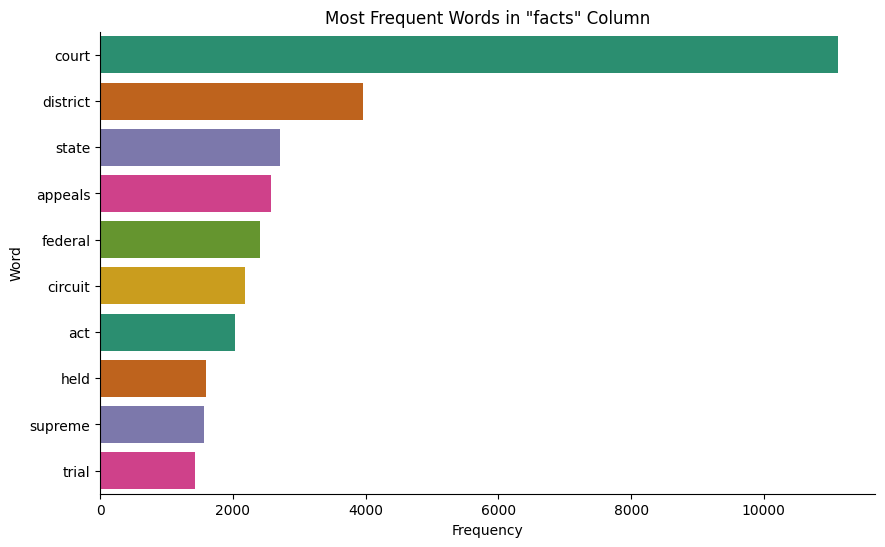

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

corpus = df['facts'].tolist()

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

word_counts = X.sum(axis=0)
words = vectorizer.get_feature_names_out()

word_freq_dict = dict(zip(words, word_counts.tolist()[0]))

sorted_word_freq = sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)

top_n = 10
top_words = sorted_word_freq[:top_n]

top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette=sns.palettes.mpl_palette('Dark2'))
plt.title('Most Frequent Words in "facts" Column')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

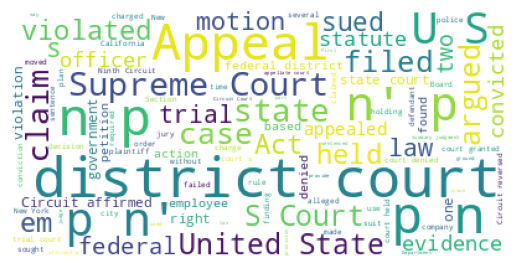

In [ ]:
import wordcloud

wc = wordcloud.WordCloud(background_color='white', max_words=100,
                         )
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()


count    3303.000000
mean     1112.496821
std       531.514960
min        26.000000
25%       757.000000
50%      1049.000000
75%      1381.000000
max      6201.000000
Name: facts_length, dtype: float64


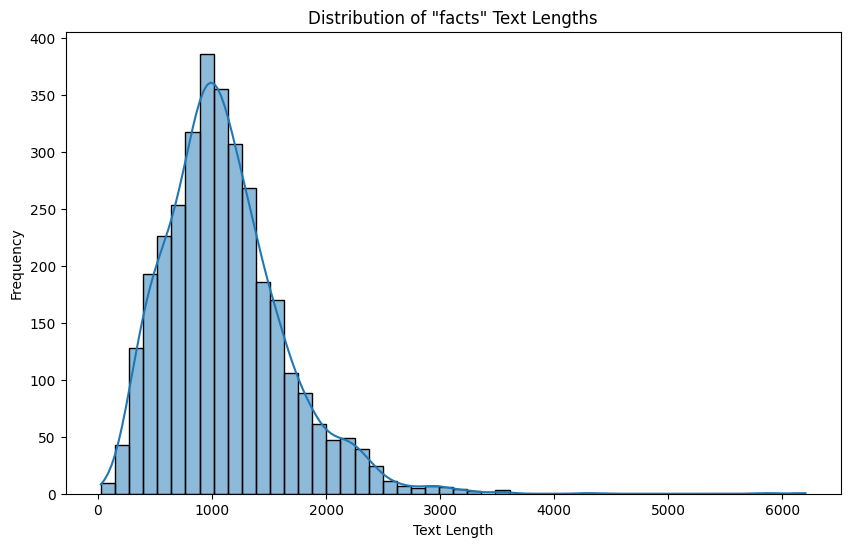

In [ ]:
df['facts_length'] = df['facts'].apply(lambda x: len(str(x)))
print(df['facts_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['facts_length'], bins=50, kde=True)
plt.title('Distribution of "facts" Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

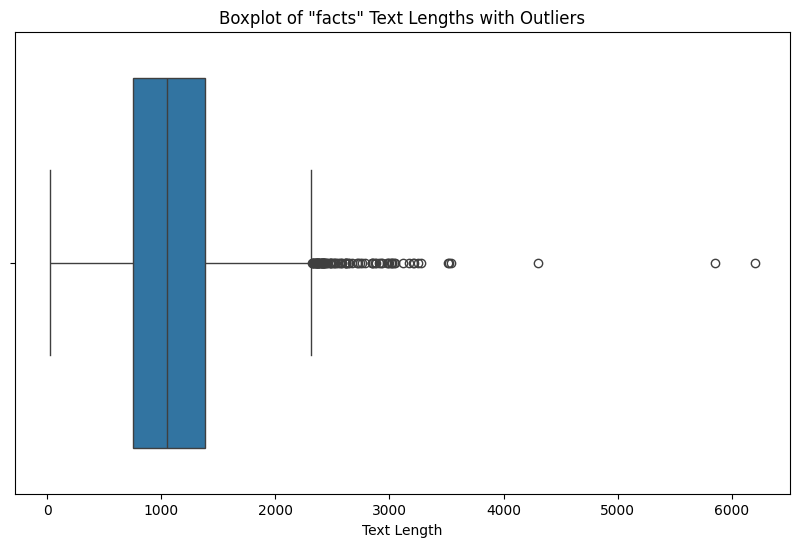

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['facts_length'])
plt.title('Boxplot of "facts" Text Lengths with Outliers')
plt.xlabel('Text Length')
plt.show()

In [ ]:
Q1 = df['facts_length'].quantile(0.25)
Q3 = df['facts_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['facts_length'] < lower_bound) | (df['facts_length'] > upper_bound)]

print("Outlier Entries:")
for index, row in outliers.iterrows():
  print(f"Index: {index}")
  print(f"Fact: {row['facts']}")
  print("-" * 20)

df = df.drop(columns=['facts_length'])

Outlier Entries:
Index: 182
Fact: <p>The village of Skokie, Illinois had a population of approximately 70,000 persons, of whom approximately 40,500 were Jewish. Included within this population were thousands who survived detention in Nazi concentration camps. On March 20, 1977, Frank Collin, the leader of the National Socialist ("Nazi") Party of America, informed Skokie's police chief that the National Socialists intended to march on the village's sidewalk on May 1. As a result of media attention and a number of phone calls allegedly made by Nazi Party members to residents with "Jewish names", this planned demonstration became common knowledge among Skokie's Jewish community.</p>
<p>Collin wrote a letter to Skokie officials stating that the purpose of the demonstration was to protest the Skokie Park District's ordinance requiring a bond of $350,000 to be posted prior to the issuance of a park permit. He also stated that the demonstration would consist of 30-50 demonstrators marching in

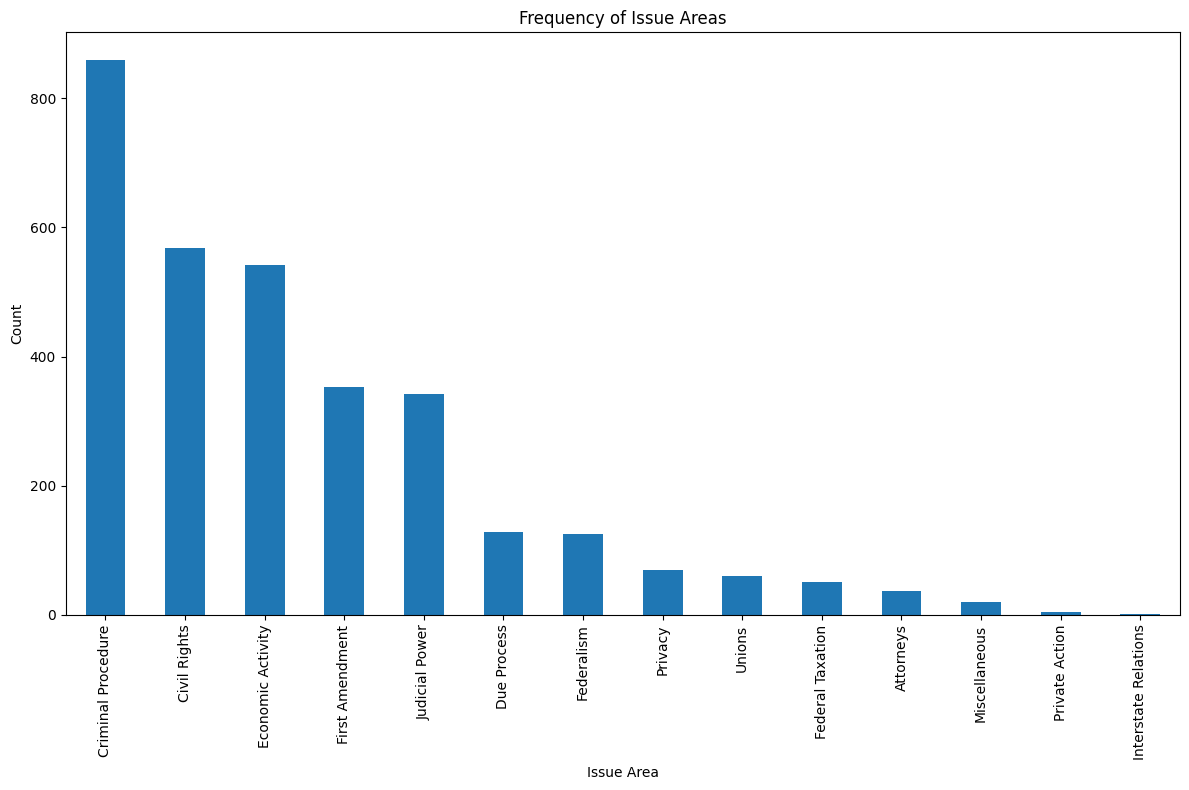

In [ ]:
issue_area_counts = df['issue_area'].value_counts()

plt.figure(figsize=(12, 8))
issue_area_counts.plot(kind='bar')
plt.title('Frequency of Issue Areas')
plt.xlabel('Issue Area')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Data Preprocessing

## Missing value handling

In [ ]:
df['issue_area'] = df['issue_area'].fillna('Unknown')

In [ ]:
df['issue_area'].isna().sum()

np.int64(0)

In [ ]:
df.dropna(subset=['first_party_winner'], inplace=True)
df.reset_index(drop=True, inplace=True)
df['first_party_winner'] = df['first_party_winner'].astype(bool)

In [ ]:
df['first_party_winner'].isna().sum()

np.int64(0)

## Lowercase `facts`

In [ ]:
df['facts'] = df['facts'].str.lower()
df['facts'][1232]

"<p>the interstate agreement on detainers (iad) is a congressionally sanctioned interstate compact to establish procedures for resolution of one state's outstanding charges against a prisoner of another state. under the compact clause, the iad is a federal law subject to federal construction. in order to resolve outstanding murder and robbery charges against michael hill, an ohio prisoner, the state of new york lodged a detainer against him under the iad. hill filed a request for disposition of the detainer, pursuant to iad article iii, and was returned to new york. article iii provides that, upon such a request, that the prisoner be brought to trial within 180 days. thereafter, hill's counsel agreed to a trial date outside the 180-day period. subsequently, hill moved to dismiss his indictment, arguing that the iad's time limit had expired. the trial court denied hill's motion, concluding that his defense counsel's explicit agreement to the trial date constituted a waiver or abandonmen

## Removing unnecessary characters

In [ ]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text() # remove html tags
    text = re.sub(r'\s+', ' ', text) # remove all whitespace and change it to only one whitespace/space
    text = re.sub(r'[^\w\s]', '', text)  # remove all special characters
    return text.strip()

In [ ]:
df['clean_facts'] = df['facts'].apply(clean_text)

In [ ]:
df['clean_facts'][1232]

'the interstate agreement on detainers iad is a congressionally sanctioned interstate compact to establish procedures for resolution of one states outstanding charges against a prisoner of another state under the compact clause the iad is a federal law subject to federal construction in order to resolve outstanding murder and robbery charges against michael hill an ohio prisoner the state of new york lodged a detainer against him under the iad hill filed a request for disposition of the detainer pursuant to iad article iii and was returned to new york article iii provides that upon such a request that the prisoner be brought to trial within 180 days thereafter hills counsel agreed to a trial date outside the 180day period subsequently hill moved to dismiss his indictment arguing that the iads time limit had expired the trial court denied hills motion concluding that his defense counsels explicit agreement to the trial date constituted a waiver or abandonment of hills iad rights after h

## Tokenization

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['tokenized_facts'] = df.apply(lambda fact: nltk.word_tokenize(fact['clean_facts']), axis=1)
df['tokenized_facts'][224]

['estelle',
 'jacobs',
 'was',
 'accused',
 'of',
 'threatening',
 'to',
 'harm',
 'a',
 'man',
 'who',
 'owed',
 'a',
 'substantial',
 'gambling',
 'debt',
 'to',
 'her',
 'employer',
 'a',
 'collections',
 'agency',
 'unbeknownst',
 'to',
 'her',
 'the',
 'phone',
 'call',
 'in',
 'which',
 'she',
 'made',
 'the',
 'threat',
 'was',
 'recorded',
 'the',
 'federal',
 'bureau',
 'of',
 'investigations',
 'contacted',
 'jacobs',
 'and',
 'informed',
 'of',
 'her',
 'miranda',
 'rights',
 'during',
 'questioning',
 'about',
 'the',
 'incident',
 'about',
 'nine',
 'months',
 'later',
 'jacobs',
 'was',
 'called',
 'before',
 'a',
 'grand',
 'jury',
 'via',
 'a',
 'subpoena',
 'regarding',
 'the',
 'threatening',
 'statements',
 'she',
 'had',
 'previously',
 'made',
 'she',
 'did',
 'not',
 'have',
 'an',
 'attorney',
 'present',
 'but',
 'she',
 'was',
 'read',
 'her',
 'fifth',
 'and',
 'sixth',
 'amendment',
 'rights',
 'during',
 'her',
 'trial',
 'jacobs',
 'denied',
 'having',
 'ma

## Stop Words and Lemmatization

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# lemmatizer = WordNetLemmatizer()

# for i in range(len(df['tokenized_facts'])):
#   words = df['tokenized_facts'][i]
#   words = [lemmatizer.lemmatize(word, pos='v') for word in words if word not in set(stopwords.words('english'))]
#   df['tokenized_facts'][i] = ' '.join(words)
#   print(df['tokenized_facts'])
#   break

# df.to_csv('processed_facts.csv', index=False)

In [ ]:
df = pd.read_csv('/content/Supreme-court-judgement-classification/processed_facts.csv')

In [ ]:
df['tokenized_facts'][1232]

'interstate agreement detainers iad congressionally sanction interstate compact establish procedures resolution one state outstanding charge prisoner another state compact clause iad federal law subject federal construction order resolve outstanding murder robbery charge michael hill ohio prisoner state new york lodge detainer iad hill file request disposition detainer pursuant iad article iii return new york article iii provide upon request prisoner bring trial within 180 days thereafter hill counsel agree trial date outside 180day period subsequently hill move dismiss indictment argue iads time limit expire trial court deny hill motion conclude defense counsel explicit agreement trial date constitute waiver abandonment hill iad right conviction subsequent appeal appellate division new york supreme court affirm trial court refusal dismiss reverse state court appeal order hill indictment dismiss counsel agreement later trial date hold waive iad speedy trial right'

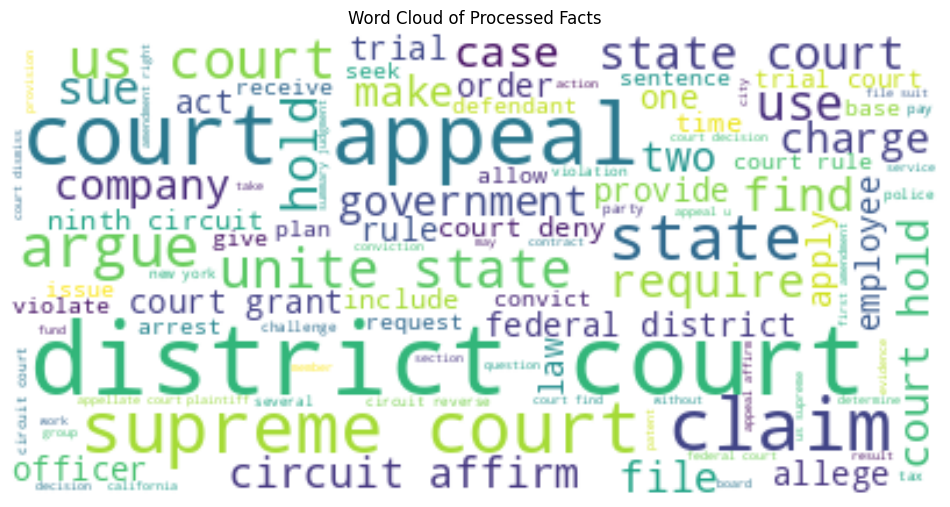

In [ ]:
all_processed_facts = ' '.join(df['tokenized_facts'].astype(str))

wc = wordcloud.WordCloud(background_color='white', max_words=100)
wc = wc.generate(all_processed_facts)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Facts')
plt.show()

## Splitting into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X = df.loc[:, ['tokenized_facts', 'issue_area']]
y = df['first_party_winner']

In [ ]:
!pip install imbalanced-learn

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=766, stratify=y)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[['issue_area']])
X_test_encoded = encoder.transform(X_test[['issue_area']])

encoded_columns = encoder.get_feature_names_out(['issue_area'])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train = pd.concat([X_train.drop(columns=['issue_area']), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['issue_area']), X_test_encoded_df], axis=1)


In [ ]:
X_train

,tokenized_facts,issue_area_Attorneys,issue_area_Civil Rights,issue_area_Criminal Procedure,issue_area_Due Process,issue_area_Economic Activity,issue_area_Federal Taxation,issue_area_Federalism,issue_area_First Amendment,issue_area_Interstate Relations,issue_area_Judicial Power,issue_area_Miscellaneous,issue_area_Privacy,issue_area_Private Action,issue_area_Unions,issue_area_Unknown
698,26 usc 7443ab chief judge unite state tax cour...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1156,shareholders seek appeal federal district cour...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3212,2012 us department homeland security dhs adopt...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2785,district columbia abortion statute prohibit ab...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2693,jones black man charge real estate company mis...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,william lillian orr divorce february 1974 will...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1469,fredy orlando ventura illegally enter unite st...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1867,state washington reconstruct primary election ...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,mary jane martin tenure teacher harrah indepen...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Word Embedding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['tokenized_facts'])
X_test_vec = vectorizer.transform(X_test['tokenized_facts'])

In [ ]:
X_train_combined = pd.concat([pd.DataFrame(X_train_vec.toarray(), index=X_train.index), X_train.drop(columns=['tokenized_facts'])], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_vec.toarray(), index=X_test.index), X_test.drop(columns=['tokenized_facts'])], axis=1)

print("Shape of X_train_vec:", X_train_vec.shape)
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of X_test_vec:", X_test_vec.shape)
print("Shape of X_test_combined:", X_test_combined.shape)

Shape of X_train_vec: (2630, 17622)
Shape of X_train_combined: (2630, 17637)
Shape of X_test_vec: (658, 17622)
Shape of X_test_combined: (658, 17637)


In [ ]:
X_train_vec.shape

(2630, 17622)

In [ ]:
X_train_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,issue_area_Federal Taxation,issue_area_Federalism,issue_area_First Amendment,issue_area_Interstate Relations,issue_area_Judicial Power,issue_area_Miscellaneous,issue_area_Privacy,issue_area_Private Action,issue_area_Unions,issue_area_Unknown
698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_combined.columns = X_train_combined.columns.astype(str)
X_test_combined.columns = X_test_combined.columns.astype(str)

In [ ]:
X_train_combined

,0,1,2,3,4,5,6,7,8,9,...,issue_area_Federal Taxation,issue_area_Federalism,issue_area_First Amendment,issue_area_Interstate Relations,issue_area_Judicial Power,issue_area_Miscellaneous,issue_area_Privacy,issue_area_Private Action,issue_area_Unions,issue_area_Unknown
698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=766)
X_train_combined, y_train = smote.fit_resample(X_train_combined, y_train)

In [ ]:
print(len(X_train_combined))
print(len(y_train))

3424
3424


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=25, random_state=766)


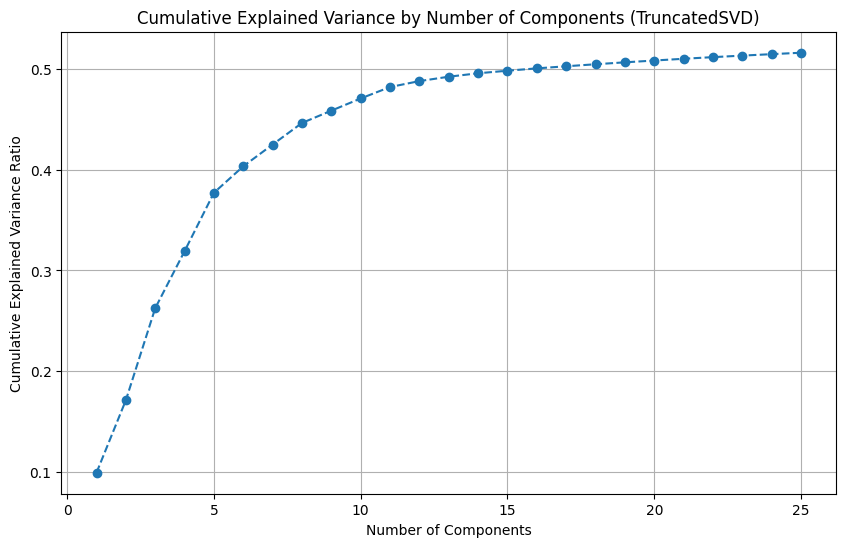

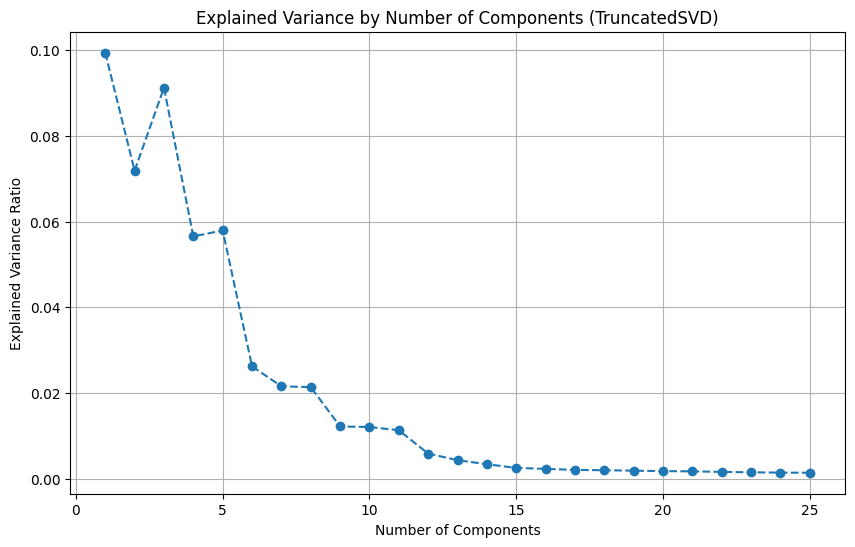

In [ ]:
svd.fit(X_train_combined)

explained_variance = svd.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components (TruncatedSVD)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components (TruncatedSVD)')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
X_train_vec = svd.fit_transform(X_train_combined, y_train)
X_test_vec = svd.transform(X_test_combined)

# Models

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
lr = LogisticRegression(random_state=766)
knn = KNeighborsClassifier()
svc = SVC(random_state=766)
nb = GaussianNB()
dt = DecisionTreeClassifier(random_state=766)
rf = RandomForestClassifier()

# gb = GradientBoostingClassifier(random_state=766)

# base_models = [
#     ('rf', RandomForestClassifier(n_estimators=100, random_state=766)),
#     ('svc', SVC(probability=True, kernel='rbf', random_state=766)),
#     ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=766)),
#     ('lr', LogisticRegression(max_iter=1000, random_state=766)),
#     ('gnb', GaussianNB())
# ]

# meta_model = RidgeClassifier()

# stack = StackingClassifier(
#     estimators=base_models,
#     final_estimator=meta_model,
#     cv=5,  # Cross-validation for training base models
#     passthrough=False,  # Set True if you want to include original features in meta-model
#     n_jobs=-1,

# )


lr_predictor = lr.fit(X_train_vec, y_train)
knn_predictor = knn.fit(X_train_vec, y_train)
svc_predictor = svc.fit(X_train_vec, y_train)
nb_predictor = nb.fit(X_train_vec, y_train)
dt_predictor = dt.fit(X_train_vec, y_train)
rf_predictor = rf.fit(X_train_vec, y_train)
# gb_predictor = gb.fit(X_train_vec, y_train)
# stack_predictor = stack.fit(X_train_vec, y_train)

In [ ]:
lr_prediction = lr_predictor.predict(X_test_vec)
knn_prediction = knn_predictor.predict(X_test_vec)
svc_prediction = svc_predictor.predict(X_test_vec)
nb_prediction = nb_predictor.predict(X_test_vec)
dt_prediction = dt_predictor.predict(X_test_vec)
rf_prediction = rf_predictor.predict(X_test_vec)
# # # gb_prediction = gb_predictor.predict(X_test_vec)
# # stack_prediction = stack.predict(X_test_vec)

In [ ]:
lr_score = accuracy_score(y_test, lr_prediction)
knn_score = accuracy_score(y_test, knn_prediction)
svc_score = accuracy_score(y_test, svc_prediction)
nb_score = accuracy_score(y_test, nb_prediction)
dt_score = accuracy_score(y_test, dt_prediction)
rf_score = accuracy_score(y_test, rf_prediction)
# # gb_score = accuracy_score(y_test, gb_prediction)
# stack_score = accuracy_score(y_test, stack_prediction)

from sklearn.metrics import recall_score, precision_score

lr_recall = recall_score(y_test, lr_prediction)
knn_recall = recall_score(y_test, knn_prediction)
svc_recall = recall_score(y_test, svc_prediction)
nb_recall = recall_score(y_test, nb_prediction)
dt_recall = recall_score(y_test, dt_prediction)
rf_recall = recall_score(y_test, rf_prediction)
# gb_recall = recall_score(y_test, gb_prediction)
# stack_recall = recall_score(y_test, stack_prediction)

lr_precision = precision_score(y_test, lr_prediction)
knn_precision = precision_score(y_test, knn_prediction)
svc_precision = precision_score(y_test, svc_prediction)
nb_precision = precision_score(y_test, nb_prediction)
dt_precision = precision_score(y_test, dt_prediction)
rf_precision = precision_score(y_test, rf_prediction)
# # gb_precision = precision_score(y_test, gb_prediction)
# stack_precision = precision_score(y_test, stack_prediction)

In [ ]:
print(f"Logistics Regression: {round(lr_score*100, 2)}%")
print(f"KNN: {round(knn_score*100, 2)}%")
print(f"SVC: {round(svc_score*100, 2)}%")
print(f"Naive Bayes: {round(nb_score*100, 2)}%")
print(f"Decision Tree: {round(dt_score*100, 2)}%")
print(f"Random Forest: {round(rf_score*100, 2)}%")
# print(f"Gradient Boosted Tree: {round(rf_score*100, 2)}%")
# print(f"Stack Classifier: {round(stack_score*100, 2)}%")

print(f"Logistics Regression Recall: {round(lr_recall*100, 2)}%")
print(f"KNN Recall: {round(knn_recall*100, 2)}%")
print(f"SVC Recall: {round(svc_recall*100, 2)}%")
print(f"Naive Bayes Recall: {round(nb_recall*100, 2)}%")
print(f"Decision Tree Recall: {round(dt_recall*100, 2)}%")
print(f"Random Forest Recall: {round(rf_recall*100, 2)}%")
# print(f"Gradient Boosted Tree Recall: {round(rf_recall*100, 2)}%")
# print(f"Stack Classifier Recall: {round(stack_score*100, 2)}%")

print(f"Logistics Regression Precision: {round(lr_precision*100, 2)}%")
print(f"KNN Precision: {round(knn_precision*100, 2)}%")
print(f"SVC Precision: {round(svc_precision*100, 2)}%")
print(f"Naive Bayes Precision: {round(nb_precision*100, 2)}%")
print(f"Decision Tree Precision: {round(dt_precision*100, 2)}%")
print(f"Random Forest Precision: {round(rf_precision*100, 2)}%")
# print(f"Gradient Boosted Tree Precision: {round(rf_precision*100, 2)}%")
# print(f"Stack Classifier Precision: {round(stack_score*100, 2)}%")


Logistics Regression: 59.27%
KNN: 54.56%
SVC: 59.42%
Naive Bayes: 63.22%
Decision Tree: 52.58%
Random Forest: 59.27%
Logistics Regression Recall: 64.02%
KNN Recall: 64.02%
SVC Recall: 71.73%
Naive Bayes Recall: 78.27%
Decision Tree Recall: 62.62%
Random Forest Recall: 76.87%
Logistics Regression Precision: 70.62%
KNN Precision: 65.39%
SVC Precision: 67.77%
Naive Bayes Precision: 69.21%
Decision Tree Precision: 63.81%
Random Forest Precision: 66.06%


In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_prediction))

print("\nKNN Classification Report:")
print(classification_report(y_test, knn_prediction))

print("\nSVC Classification Report:")
print(classification_report(y_test, svc_prediction))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_prediction))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_prediction))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_prediction))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.43      0.50      0.46       230
        True       0.71      0.64      0.67       428

    accuracy                           0.59       658
   macro avg       0.57      0.57      0.57       658
weighted avg       0.61      0.59      0.60       658


KNN Classification Report:
              precision    recall  f1-score   support

       False       0.36      0.37      0.36       230
        True       0.65      0.64      0.65       428

    accuracy                           0.55       658
   macro avg       0.50      0.50      0.50       658
weighted avg       0.55      0.55      0.55       658


SVC Classification Report:
              precision    recall  f1-score   support

       False       0.41      0.37      0.39       230
        True       0.68      0.72      0.70       428

    accuracy                           0.59       658
   macro avg       0.54      

In [ ]:
import joblib
joblib.dump(knn_predictor, 'knn_model.joblib')

['knn_model.joblib']

# Pipelines

In [ ]:
facts = "<p>Estelle Jacobs was accused of threatening to harm a man who owed a substantial gambling debt to her employer, a collections agency. Unbeknownst to her, the phone call in which she made the threat was recorded. The Federal Bureau of Investigations contacted Jacobs and informed of her Miranda rights during questioning about the incident. About nine months later, Jacobs was called before a grand jury via a subpoena regarding the threatening statements she had previously made. She did not have an attorney present, but she was read her Fifth and Sixth Amendment rights. During her trial, Jacobs denied having made the phone call, the tape of the recorded phone call was played, and she was subsequently indicted. The district court dismissed the indictment and held that a witness in a trial who is a potential defendant should be informed of that potential upon taking the witness stand and is entitled to full Miranda warnings under those circumstances.</p>"
issue_area = "Privacy"

facts = facts.lower()
facts

'<p>estelle jacobs was accused of threatening to harm a man who owed a substantial gambling debt to her employer, a collections agency. unbeknownst to her, the phone call in which she made the threat was recorded. the federal bureau of investigations contacted jacobs and informed of her miranda rights during questioning about the incident. about nine months later, jacobs was called before a grand jury via a subpoena regarding the threatening statements she had previously made. she did not have an attorney present, but she was read her fifth and sixth amendment rights. during her trial, jacobs denied having made the phone call, the tape of the recorded phone call was played, and she was subsequently indicted. the district court dismissed the indictment and held that a witness in a trial who is a potential defendant should be informed of that potential upon taking the witness stand and is entitled to full miranda warnings under those circumstances.</p>'

In [ ]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

facts = clean_text(facts)
facts

'estelle jacobs was accused of threatening to harm a man who owed a substantial gambling debt to her employer a collections agency unbeknownst to her the phone call in which she made the threat was recorded the federal bureau of investigations contacted jacobs and informed of her miranda rights during questioning about the incident about nine months later jacobs was called before a grand jury via a subpoena regarding the threatening statements she had previously made she did not have an attorney present but she was read her fifth and sixth amendment rights during her trial jacobs denied having made the phone call the tape of the recorded phone call was played and she was subsequently indicted the district court dismissed the indictment and held that a witness in a trial who is a potential defendant should be informed of that potential upon taking the witness stand and is entitled to full miranda warnings under those circumstances'

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
fact_tokenized = nltk.word_tokenize(facts)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

words = fact_tokenized
words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
fact_lemmatized = ' '.join(words)

In [ ]:
fact_lemmatized

'estelle jacob accused threatening harm man owed substantial gambling debt employer collection agency unbeknownst phone call made threat recorded federal bureau investigation contacted jacob informed miranda right questioning incident nine month later jacob called grand jury via subpoena regarding threatening statement previously made attorney present read fifth sixth amendment right trial jacob denied made phone call tape recorded phone call played subsequently indicted district court dismissed indictment held witness trial potential defendant informed potential upon taking witness stand entitled full miranda warning circumstance'

In [ ]:
from sklearn.pipeline import Pipeline as SklearnPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ('text_processing', TfidfVectorizer(), 'tokenized_facts'),
        ('categorical_processing', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['issue_area'])
    ],
)

pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('oversampler', SMOTE(sampling_strategy="not majority", random_state=766)),
    ('svd', TruncatedSVD(n_components=25, random_state=766)),
    ('classifier', GaussianNB())
])

X = df.loc[:, ['tokenized_facts', 'issue_area']]
y = df['first_party_winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=766, stratify=y)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Naive bayes Classification Report (dari pipeline):")
print(classification_report(y_test, y_pred))

naive_bayes_accuracy_pipeline = accuracy_score(y_test, y_pred)
print(f"Naive bayes Accuracy (dari pipeline): {round(naive_bayes_accuracy_pipeline*100, 2)}%")

joblib.dump(pipeline, 'naive_bayes.joblib')

Naive bayes Classification Report (dari pipeline):
              precision    recall  f1-score   support

       False       0.47      0.35      0.40       230
        True       0.69      0.78      0.73       428

    accuracy                           0.63       658
   macro avg       0.58      0.57      0.57       658
weighted avg       0.61      0.63      0.62       658

Naive bayes Accuracy (dari pipeline): 63.22%


['naive_bayes.joblib']

In [ ]:

loaded_pipeline = joblib.load('naive_bayes.joblib')

data_baru = pd.DataFrame({
    'tokenized_facts': [fact_lemmatized],
    'issue_area': [issue_area]
})

prediksi_baru = loaded_pipeline.predict(data_baru)
probabilitas_prediksi_baru = None
if hasattr(loaded_pipeline, 'predict_proba'):
    probabilitas_prediksi_baru = loaded_pipeline.predict_proba(data_baru)


print(f"\nHasil prediksi untuk input baru (first_party_winner): {prediksi_baru[0]}")

if prediksi_baru[0]:
    print("Interpretasi: Pihak pertama diprediksi akan MENANG.")
else:
    print("Interpretasi: Pihak pertama diprediksi akan KALAH.")

if probabilitas_prediksi_baru is not None:
    print(f"Probabilitas prediksi: {probabilitas_prediksi_baru[0]}")
    print(f"Probabilitas pihak pertama KALAH (False): {probabilitas_prediksi_baru[0][0]:.4f}")
    print(f"Probabilitas pihak pertama MENANG (True): {probabilitas_prediksi_baru[0][1]:.4f}")


Hasil prediksi untuk input baru (first_party_winner): False
Interpretasi: Pihak pertama diprediksi akan KALAH.
Probabilitas prediksi: [0.6 0.4]
Probabilitas pihak pertama KALAH (False): 0.6000
Probabilitas pihak pertama MENANG (True): 0.4000


# Summarization using LLM

In [ ]:
!pip install openai

In [ ]:
prompt = f"""
Analyze the following legal case scenario:

Case Facts:
'{facts}'

Issue Area:
'{issue_area}'

First Party:
Jacobs

Second Party:
Miranda

Predicted Outcome for the First Party:
'{'Win' if prediksi_baru[0] else 'Lose'}'

Task:
Based *only* on the information provided above (Case Facts, Issue Area, and Predicted Outcome), please provide a brief summary outlining 2-3 potential key factors or lines of reasoning that could support the predicted outcome. Focus on aspects within the case facts or the nature of the issue area that might logically lead to this prediction. Don't incorporate the first party or second party into the reason leadin to this prediction, but you may state their name on the summary.

Please structure your response as follows:
Potential supporting factors for the prediction that the "[Restate Predicted Outcome for the First Party, e.g., First Party Wins]":
1. [Factor 1]
2. [Factor 2]
3. [Factor 3 (optional)]

Important Considerations for your analysis:
- Your explanation should be based on logical inference from the provided text.
- Do not introduce external knowledge or legal precedents not mentioned in the provided facts.
- Use cautious and analytical language (e.g., 'might suggest,' 'could be due to,' 'a possible factor is').
- The goal is to identify potential reasoning within the given context, not to provide definitive legal advice or a comprehensive case analysis.
"""

In [ ]:
from openai import OpenAI
from google.colab import userdata


client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=userdata.get('API_KEY')

)

completion = client.chat.completions.create(
  model="meta-llama/llama-3.3-8b-instruct:free",
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ]
)
print(completion.choices[0].message.content)

Potential supporting factors for the prediction that the "First Party Lose":
1. The delay of approximately nine months between Jacobs' questioning by the FBI and her subsequent grand jury appearance might suggest that the process was not timely or straightforward, potentially leading to a negative outcome for Jacobs.
2. The fact that Jacobs was not informed of her potential status as a defendant until she was called before the grand jury, without having an attorney present, could be a crucial factor in the predicted outcome, as it may have impacted her ability to defend herself effectively.
3. The distinction made by the district court regarding the need for full Miranda warnings when a witness is a potential defendant might be a key factor in the predicted loss, as it could imply that Jacobs was not adequately protected during the questioning process.
